The aim of this project is to build a fake news classifier using Natural Language Processing (NLP)

## Loading necessary libraries

In [1]:
pip install nlp-utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 1.2 MB/s eta 0:00:00


In [2]:
import nlp_utils
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Reading the data

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


The label column will be our target column. A value of 0 indicates that the given sentence is not fake, while a value of 1 indicates that the sentence is fake

In [5]:
df.shape

(20800, 5)

In [6]:
# Increase the width of the columns
pd.set_option('display.max_colwidth', None)

In [7]:
# The title contains the headline of the news
df['title']

,title
0,House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It
1,"FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart"
2,Why the Truth Might Get You Fired
3,15 Civilians Killed In Single US Airstrike Have Been Identified
4,Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery
...,...
20795,Rapper T.I.: Trump a ’Poster Child For White Supremacy’
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times"
20797,Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times
20798,"NATO, Russia To Hold Parallel Exercises In Balkans"


In [8]:
# The text columns contains the information regarding the headline
df['text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails it had recently discovered in order to see if they contained classified information. Not long after this letter went out, Oversight Committee Chairman Jason Chaffetz set the political world ablaze with this tweet. F

In [9]:
df['label'].value_counts()

,count
label,
1,10413
0,10387


In [10]:
df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [11]:
# Drop all null values
df = df.dropna()

In [12]:
df.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [13]:
df.reset_index(inplace=True)

In [14]:
df

index     id  \
0          0      0   
1          1      1   
2          2      2   
3          3      3   
4          4      4   
...      ...    ...   
18280  20795  20795   
18281  20796  20796   
18282  20797  20797   
18283  20798  20798   
18284  20799  20799   

                                                                                               title  \
0                  House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It   
1                                            FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart   
2                                                                  Why the Truth Might Get You Fired   
3                                    15 Civilians Killed In Single US Airstrike Have Been Identified   
4      Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery   
...                                                                                              ...   
18280                                        Rapper T.I.: Trump a ’Poster Child For White Supremacy’   
18281                              N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times   
18282               Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times   
18283                                             NATO, Russia To Hold Parallel Exercises In Balkans   
18284                                                                      What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
18280                              Jerome Hudson   
18281                           Benjamin Hoffman   
18282  Michael J. de la Merced and Rachel Abrams   
18283                                Alex Ansary   
18284                              David Swanson   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

## Text cleaning

In [15]:
import re
import string

In [16]:
# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# .lower() - convert all strings to lowercase
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# remove all non-ascii characters
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# apply all the lambda functions wrote previously through .map on the comments column
df['text'] = df['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

<ipython-input-16-42a7e9535297>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)


In [17]:
df['text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it by darrell lucus on october      subscribe jason chaffetz on the stump in american fork  utah   image courtesy michael jolley  available under a creative commons by license   with apologies to keith olbermann  there is no doubt who the worst person in the world is this week fbi director james comey  but according to a house democratic aide  it looks like we also know who the second worst person is as well  it turns out that when comey sent his now infamous letter announcing that the fbi was looking into emails that may be related to hillary clinton s email server  the ranking democrats on the relevant committees didn t hear about it from comey  they found out via a tweet from one of the republican committee chairmen   as we now know  comey notified the republican chairmen and democratic ranking members of the house intelligence  judiciary  and oversight committees that his agency was reviewing emails it had recently discovered in order to see if they contained classified information  not long after this letter went out  oversight committee chairman jason chaffetz set the political world ablaze with this tweet  fbi dir just inform

## Remove stop words and stem the text

In NLP, unnecessary words in data are referred to as stop words. Stop words are commonly used words (such as "the," "a," "an," "in," etc.) that a search engine is programmed to ignore both when indexing entries and when retrieving them as search results.

The Porter stemming algorithm, or "Porter stemmer," is a process for removing common morphological and inflectional endings from English words. It is primarily used as part of a term normalization process, typically implemented when setting up information retrieval systems.

In [18]:
pip install nltk

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

## Split the dataframe

In [21]:
Y = df['label']

In [22]:
Y.head()

,label
0,1
1,0
2,1
3,1
4,1


## Train Test data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], Y, test_size = 0.3, random_state = 40)


## Tfidf Vectorizer


The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Alternatively, if you already have a leamed CountVectorizer, you can use it with a TfidfTransformer to just calculate the inverse document frequencies and start encoding documents

In [24]:
# Aply Tfidf to the data set
tfidf_vect = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [25]:
print(tfidf_test)

  (0, 116553)	0.03886548223169257
  (0, 115702)	0.02577799575708681
  (0, 115692)	0.00904800329154621
  (0, 114895)	0.009673419081344278
  (0, 114861)	0.016618616020114874
  (0, 114848)	0.010562420147987915
  (0, 113165)	0.013935134858730162
  (0, 113110)	0.016117563226566926
  (0, 113013)	0.027915866741656793
  (0, 112960)	0.0187879083094958
  (0, 112621)	0.014233357454810993
  (0, 112502)	0.033848840233184616
  (0, 112472)	0.018913078792303722
  (0, 111638)	0.022574963902960127
  (0, 111149)	0.03305268263185922
  (0, 110726)	0.030170078331103658
  (0, 110466)	0.011808060706868613
  (0, 110343)	0.03305268263185922
  (0, 110196)	0.017882582744640885
  (0, 108797)	0.0201639418741461
  (0, 107753)	0.0445860293134556
  (0, 107752)	0.0445860293134556
  (0, 107301)	0.026722385232109524
  (0, 106653)	0.04142088061358076
  (0, 106336)	0.015087881216580364
  :	:
  (5485, 14393)	0.030676892638861704
  (5485, 13981)	0.03850878930619704
  (5485, 13630)	0.05358526389326042
  (5485, 11899)	0.037197

In [26]:
# Get the feature names of 'tfidf_vectorizer'
print(tfidf_vect.get_feature_names_out()[-10:])

['zwrocie' 'zwrotu' 'zwyci' 'zxycmwjdxj' 'zyaratgah' 'zygankow'
 'zylinderkopfdichtung' 'zynga' 'zytsov' 'zyuganov']


## Count Vectorizer

The CountVectorizer offers a straightforward method to both tokenize a collection of text documents and construct a vocabulary of known words. Additionally, it allows you to encode new documents using this vocabulary. \

You can use it as follows: \

Create an instance of the CountVectorizer class. Invoke the fit() function to learn a vocabulary from one or more documents. Subsequently, call the transform() function on one or more documents to encode each as a vector. An encoded vector is returned with a length equal to the size of the entire vocabulary, containing integer counts representing the frequency of each word in the document.

In [27]:
count_vect = CountVectorizer(stop_words = 'english')
count_train = count_vect.fit_transform(X_train)
count_test = count_vect.transform(X_test)

In [28]:
print(count_test)

  (0, 57)	1
  (0, 807)	1
  (0, 1146)	1
  (0, 1150)	2
  (0, 1164)	1
  (0, 1812)	1
  (0, 1947)	1
  (0, 2541)	1
  (0, 2646)	1
  (0, 3505)	4
  (0, 3882)	2
  (0, 4948)	1
  (0, 5342)	1
  (0, 5768)	1
  (0, 6331)	1
  (0, 6941)	1
  (0, 6948)	1
  (0, 7269)	1
  (0, 8868)	1
  (0, 8874)	1
  (0, 8878)	3
  (0, 9309)	1
  (0, 9457)	9
  (0, 9503)	2
  (0, 9718)	1
  :	:
  (5485, 100570)	1
  (5485, 102087)	1
  (5485, 103139)	1
  (5485, 103332)	1
  (5485, 104069)	1
  (5485, 104142)	1
  (5485, 104480)	1
  (5485, 104552)	1
  (5485, 104782)	1
  (5485, 104912)	2
  (5485, 105867)	5
  (5485, 106262)	1
  (5485, 107691)	1
  (5485, 108797)	1
  (5485, 108839)	4
  (5485, 109772)	1
  (5485, 111259)	1
  (5485, 111530)	2
  (5485, 113165)	1
  (5485, 113823)	1
  (5485, 114711)	1
  (5485, 114723)	1
  (5485, 115134)	1
  (5485, 115692)	1
  (5485, 116007)	1


In [29]:
# Get the feature names of 'count_vectorize'
print(count_vect.get_feature_names_out()[0:10])

['aa' 'aaa' 'aaah' 'aaahhh' 'aaajiao' 'aaany' 'aaas' 'aab' 'aabb' 'aac']


## Model Building

### 1. Naive Bayes Model

#### TF-IDF vectorized

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [31]:
clf = MultinomialNB()
clf.fit(tfidf_train, Y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
print(cm)

accuracy: 0.772
[[3103    8]
 [1243 1132]]


In [32]:
print("Wrong predictions out of total")
print((Y_test != pred ).sum(), '/', ((Y_test == pred ).sum()+(Y_test != pred ).sum()))
print("Percentage accuracy: ", 100*accuracy_score(Y_test, pred))

Wrong predictions out of total
1251 / 5486
Percentage accuracy:  77.19650018228216


<Axes: >

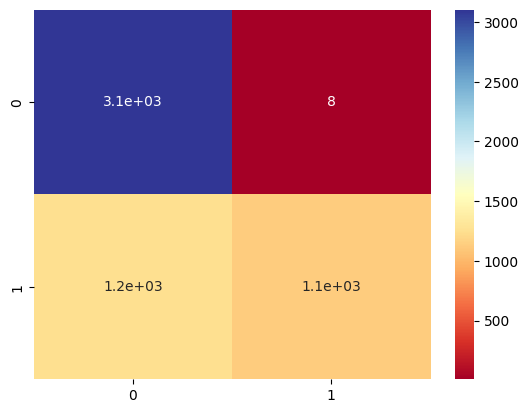

In [33]:
# Plot the confusion matrix for TF-IDF vectorizer
sns.heatmap(cm, cmap = "RdYlBu", annot=True)

#### Count Vectorized


In [34]:
clf = MultinomialNB()
clf.fit(count_train, Y_train)
pred1 = clf.predict(count_test)
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy: %0.3f" % score)
cm2 = metrics.confusion_matrix(Y_test, pred1)
print(cm2)

accuracy: 0.903
[[2977  134]
 [ 397 1978]]


In [35]:
print("Wrong predictions out of total")
print((Y_test != pred1).sum(), '/', ((Y_test == pred1).sum()+(Y_test != pred1).sum()))
print("Percentage accuracy: ", 100*accuracy_score(Y_test, pred1))

Wrong predictions out of total
531 / 5486
Percentage accuracy:  90.32081662413415


When comparing the accuracy and incorrect predictions of the Count Vectorizer model and the TF-IDF model, it is evident that the Count Vectorizer model outperformed the TF-IDF model

<Axes: >

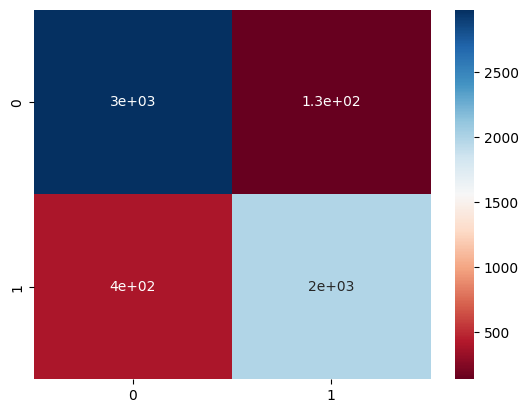

In [36]:
# Plot theconfusion matrix for Count Vectorizer
sns.heatmap(cm2, cmap = "RdBu", annot = True)

### 2. Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestClassifier

#### TF-IDF Vectorized

In [38]:
RF = RandomForestClassifier().fit(tfidf_train, Y_train)
train_pred2 = RF.predict(tfidf_train)
print("Model accuracy on train is: ", accuracy_score(Y_train, train_pred2))

test_pred2 = RF.predict(tfidf_test)
print("Model accuracy on test is: ", accuracy_score(Y_test, test_pred2))
print('-'*50)

# Confusion matrix
print("confusion_matrix on train is: \n", metrics.confusion_matrix(Y_train, train_pred2))
print("confusion_matrix on test is: \n", metrics.confusion_matrix(Y_test, test_pred2))
print('-'*50)

print("Wrong prediction out of total:")
print((Y_test != test_pred2).sum(), '/', ((Y_test == test_pred2).sum()+(Y_test != test_pred2).sum()))
print('-'*50)

Model accuracy on train is:  0.9999218688960075
Model accuracy on test is:  0.9030258840685381
--------------------------------------------------
confusion_matrix on train is: 
 [[7249    1]
 [   0 5549]]
confusion_matrix on test is: 
 [[3040   71]
 [ 461 1914]]
--------------------------------------------------
Wrong prediction out of total:
532 / 5486
--------------------------------------------------


#### Count Vectorized

In [39]:
RF = RandomForestClassifier().fit(count_train, Y_train)
train_pred3 = RF.predict(count_train)
print("Model accuracy on train is: ", accuracy_score(Y_train, train_pred3))

test_pred3 = RF.predict(count_test)
print("Model accuracy on test is: ", accuracy_score(Y_test, test_pred3))
print('-'*50)

# Confusion matrix
print("confusion_matrix on train is: \n", metrics.confusion_matrix(Y_train, train_pred3))
print("confusion_matrix on test is: \n", metrics.confusion_matrix(Y_test, test_pred3))
print('-'*50)

print("Wrong prediction out of total:")
print((Y_test != test_pred3).sum(), '/', ((Y_test == test_pred3).sum()+(Y_test != test_pred3).sum()))
print('-'*50)

Model accuracy on train is:  0.9999218688960075
Model accuracy on test is:  0.9012030623405031
--------------------------------------------------
confusion_matrix on train is: 
 [[7249    1]
 [   0 5549]]
confusion_matrix on test is: 
 [[3037   74]
 [ 468 1907]]
--------------------------------------------------
Wrong prediction out of total:
542 / 5486
--------------------------------------------------



Comparing the four models, the Naive Bayes model with TF-IDF vectorization has the lowest accuracy at 0.77, with 1,251 wrong predictions out of 5,486. When using count vectorization, the Naive Bayes model performs significantly better with an accuracy of 0.903 and 531 wrong predictions, showing the impact of vectorization on this model's performance. For the Random Forest model, TF-IDF vectorization gives an accuracy of 0.903, with 532 wrong predictions, which is almost identical to Naive Bayes with count vectorization. Finally, the Random Forest model with count vectorization yields a slightly lower accuracy of 0.901, with 542 wrong predictions.

Overall, vectorization plays a key role in Naive Bayes, while Random Forest performs consistently well with both vectorization techniques.